<a href="https://colab.research.google.com/github/maryadriennerdrgz/Linear-Algebra-Compilation/blob/master/Rodriguez_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Algebra for CpE**
##**Laboratory 8 : System of Linear Equations** <br>
Now that you have a fundamental knowledge about vector representations, we'll try to solve them in higher dimensions. <br>
<br>
######**Objectives**
At the end of this activity you will be able to:
1. Be familiar with sysem of linear equations.
2. Solve system of linear equations using the various linear algebra techniques.
3. Solve system of equations using Python programming.


#**Discussion**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#**System of Linear Equations**<br>

Take this scenario as an example:
Let's say you are selling lilies as a business in which you sell them 300 pesos for a dozen. However, the cost of growing and maintaining each lily costs around 8 pesos per month with an initial upkeep 50 pesos. How many dozens of lilies will you need to sell to regain your costs?
We can model this equation by:

$$cost = x + 8y + 50\\ revenue = 12x + 300y  $$
And if we plot that it would be:

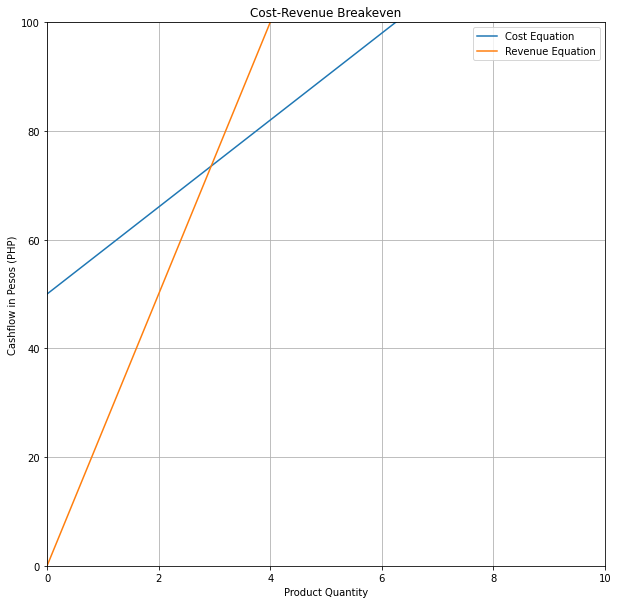

In [ ]:
## Since they are linear equations in a system we can declare them as NumPy arrays
cost = np.array([1,8, 50])
revenue = np.array([12, 300, 0])

c = np.arange(0,100)


plt.figure(figsize=(10,10)) 
plt.title('Cost-Revenue Breakeven')
plt.xlim(0,10)
plt.ylim(0,100)

plt.xlabel('Product Quantity')
plt.ylabel('Cashflow in Pesos (PHP)')

plt.plot(c*cost[0],c*cost[1]+cost[2], label='Cost Equation')
plt.plot(c*revenue[0],c*revenue[1]+revenue[2], label='Revenue Equation')

plt.grid()
plt.legend()
plt.show()

We can see here that there is a point where the Cost and Revenue equation intersect. This is what we call the "breakeven" point, it means that in this case the key value of expenditure and revenue equate to each other or simply it is the time your gains are equal to your losses.

Although we could see an intersection but how do we get the exact value?

#**Solving System of Linear Equations**<br> 

Solving system of linear equations can be done using various techniques such as:

* Gaussian Elimination
* Gauss-Jordan Elimination
* Cramer's Rule
<br>

For the lecture part of this laboratory activity you should be taught about how to do Gaussian Elimination and Gauss-Jordan Elimination. Cramer's Rule.
So assuming the theory and manual approach in solving linear equations is out of the way, we'll try to solve them programmatically.

So given an equation: $$ B = \left\{ \begin{array}\\ x+y+z=1\\ 3x -2y -z=4 \\ -x + 4y +2z=-3 \end{array} \right. $$

We can represent it in matrix form considering the linear combination of the equations. We can also think of its dot product form:$$
\begin{bmatrix}1&amp;1&amp;1\\3&amp;-2&amp;-1\\-1&amp;4&amp;2\end{bmatrix} \cdot \begin{bmatrix}x\\ y\\ z\end{bmatrix} = \begin{bmatrix}1\\4\\-3\end{bmatrix}
$$We can make a general form for this equation by putting our matrices and vectors as variables. So let's say that the matrix $\begin{bmatrix}1&amp;1&amp;1\\3&amp;-2&amp;-1\\-1&amp;4&amp;2\end{bmatrix}$ is $X$ and $\begin{bmatrix}x\\ y\\ z\end{bmatrix} = \begin{bmatrix}x\\y\\z\end{bmatrix}$ is the vector $r$ then the answer $\begin{bmatrix}1\\4\\-3\end{bmatrix}$ as $Y$. So we'll have:$$
X r = Y
$$Our goal is to solve for $r$ so we can solve it algebraically by multiplying both sides with the inverse of $X$, so we'll get:$$
X^{-1}X r = X^{-1}Y\\
Ir = X^{-1}Y\\
r = X^{-1}Y
$$We'll take $r = X^{-1}Y$ as the $\textbf{vectorized}$ equation as our formula in solving for the vector $r$ or simply solving for $x,y,$and$z$. We can then code that as:

In [ ]:
X = np.array([
    [1,1,1],
    [3,-2,-1],
    [-1,4,2]
])
Y = np.array([
    [1],
    [4],
    [-3]
])
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[ 1  1  1]
 [ 3 -2 -1]
 [-1  4  2]]
(3, 3)
[[ 1]
 [ 4]
 [-3]]
(3, 1)


In [ ]:
X_inv = np.linalg.inv(X)
X_inv

array([[ 0. ,  0.4,  0.2],
       [-1. ,  0.6,  0.8],
       [ 2. , -1. , -1. ]])

In [ ]:
r = X_inv @ Y
r

array([[ 1.],
       [-1.],
       [ 1.]])

To valdiate if $r$ is correct then we can back-substitute to our equation $X r = Y$ to check if the dot product of $X$ and $r$ is $Y$.

In [ ]:
X @ r

array([[ 1.],
       [ 4.],
       [-3.]])

In [ ]:
## Ar = Y
A = np.array([
    [1,1,1],
    [1,-1,-1],
    [2,1,2]
])
Y = np.array([
    [1],
    [2],
    [4]
])

In [ ]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 5.00000000e-01,  5.00000000e-01, -1.11022302e-16],
       [ 2.00000000e+00,  1.48029737e-16, -1.00000000e+00],
       [-1.50000000e+00, -5.00000000e-01,  1.00000000e+00]])

In [ ]:
r = A_inv @ Y
r

array([[ 1.5],
       [-2. ],
       [ 1.5]])

In [ ]:
Y_1 = A @ r
np.array_equal(Y_1, Y)

False

####**Practical Examples**<br> 

**Problem 1**<br>

So let's start off with an easy one. Let's say you have a bakery and you are purchasing supplies consisting of flour, yeast, and eggs from your supplier. For month 1 you bought a bakery promo that consists of 30 sacks of flour, 10 packs of yeast, and 120 eggs and you are charged for 12,500 pesos. For month two you bought a different bakery promo that consists of 40 sacks of flourm 20 packs of yeast, and 200 eggs then you are charged with 18,000 pesos. And then for month three you bought yet a different bakery promo that consists of 50 sacks of flour, 40 packs of yeast, and 360 eggs for 25,700 pesos. Now you are wondering if the promos are more cost-effective compared to buying them as a regular buyer, what could be the price of the flour per sack, yeast per pack, and one piece of egg?

We can first model the equation as such:<br>

$Let : \\ 
a = sack\ of\ flour, b = pack\ of\ yeast, c = a\ piece\ of\ egg \\ \\
M_1: 30a + 10b + 120c = 12,500 \\
M_2: 40a + 20b + 200c = 18,000 \\
M_3: 50a + 40b + 360c = 25,700$

<br>
We can now notice that the three months form a system of linear equation for the bakery promo purchases.
We can then form make an algebraic expression for solving the linear equations:<br>


$$\begin{bmatrix}30 & 10 & 120\\40 & 20 & 200\\50 & 40 & 360\end{bmatrix}\cdot\begin{bmatrix}a\\b\\c\end{bmatrix} = \begin{bmatrix}12,500\\18,000\\25,700\end{bmatrix}$$<br>

So following our formula in solving linear equation $X r = Y$ we can solve for $a, b$ and $c$.

In [ ]:
quantities = np.array([
    [30, 10, 120],
    [40, 20, 200],
    [50, 40, 360]
])
cost = np.array([
    [12500],
    [18000],
    [25700]
])

In [ ]:
prices = np.linalg.inv(quantities) @ cost 
print('The price of one sack of flour is: PHP {:.2f}'.format(float(prices[0])))
print('The price of one pack of yeast is: PHP {:.2f}'.format(float(prices[1])))
print('The price of one piece of egg is: PHP {:.2f}'.format(float(prices[2])))

The price of one sack of flour is: PHP 330.00
The price of one pack of yeast is: PHP 140.00
The price of one piece of egg is: PHP 10.00


**Problem 2**<br>

Solving for the currents of a electrical network can be determined by solving it as a system of linear equations. Given the image below, we ca ntry to solve for $I_1$, $I_2$, and $I_3$.

Using the first Kirchoff law we can form two linear equations with respect to $I_1$, $I_2$, and $I_3$.
First is Loop 1 with $E_1$:$$E_1 = I_1 R_1 - I_2 R_2\\
12 = 1500I_1 - 600R_2$$Then with Loop 2 with $B_2$:$$E_2 = I_3 R_3 + I_2 R_2\\
15 = 900I_3 + 600R_2$$The we can get the third linear equation using Kirchoff's second law on a junction:$$I_3 = I_1 + I_2 \\
0 = I_1 + I_2 - I_3$$

We can then write them properly:
$$
1500I_1 - 600I_2 = 12 \\
600I_2 + 900I_3 = 15\\
I_1 + I_2 - I_3 = 0\\
$$So then we can put it in its vectorized form:
$$
\begin{bmatrix}1500 & -600 & 0\\0 & 600 & 900\\1 & 1 & -1\end{bmatrix} \cdot \begin{bmatrix}I_1\\I_2\\I_3\end{bmatrix} = \begin{bmatrix}12\\15\\0\end{bmatrix}
$$

In [ ]:
X = np.array([
    [1500,-600,0],
    [0,600,900],
    [1,1,-1]
])
Y = np.array([
    [12],
    [15],
    [0]
])
currents = np.linalg.inv(X) @ Y
for i in range(currents.size):
    print(f'I{i+1} = {round(float(currents[i]),4)} A')

I1 = 0.0097 A
I2 = 0.0042 A
I3 = 0.0139 A


**Exercise**<br>

1. Try to find your own example of a system of linear equations (minimum of 2 equations) and solve them using the inverse equation. Explain the details of your example.


ABCD Company makes a school supplies consisting pens, notebooks, color set and ruler. For the **first quarter** the company sold their items consists of *121 pens*, *755 notebooks*, *120 color set* and *75 rulers* and their revenue is 38,424 pesos. For the **second quarter** the company sold their items consists of *231 pens*, *89 notebooks*, *3 color set* and *125 rulers* and their profit is 9,125. For the **third quarter** the company sold their items consists of *340 pens*, *438 notebooks*, *325 color set* and *35 rulers* and their profit is *150,000*. For the **last quarter** the company sold their items consists of *560 pens*, *672 notebooks*, *255 color set* and *100 rulers* and their profit is 43,216. Now you're wondering what is the price of the items 

From the quarters given are the highest revenue. What could be the price of the pen, notebook, and color?<br>

$Let : \\ 
a = pen, b = notebook, c = color set, d = ruler  \\ \\
M_1: 121a + 755b + 125c + 75d = 38,424 \\
M_2: 231a + 89b + 3c + 125d = 9,125 \\
M_3: 340a + 438b + 325c + 35d = 30,179 \\
M_4: 560a + 672b + 255c + 100d = 43,216 $
<br>

We can then form make an algebraic expression for solving the linear equations:
<br>

$$\begin {bmatrix}121 & 755 & 125 & 75\\231 & 89 & 3 & 125 \\ 340 & 438 & 325 & 35 \\ 560 & 672 & 255 & 100\end{bmatrix}\cdot\begin{bmatrix}a\\b\\c\\d\end{bmatrix} = \begin{bmatrix}38,424\\9,125\\30,179 \\ 43,216\end{bmatrix}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
item = np.array([
    [121, 755, 120, 75],
    [231, 89, 3, 125],
    [340, 438, 325, 35],
    [560, 672, 255, 100]
])
revenue = np.array([
    [38424],
    [9125],
    [30179],
    [43216]
])

In [18]:
prices = np.linalg.inv(item) @ revenue 
print('The price of one piece of pen is PHP {:.2f}'.format(float(prices[0])))
print('The price of one oiece of notebook is PHP {:.2f}'.format(float(prices[1])))
print('The price of one set of color set is PHP {:.2f}'.format(float(prices[2])))
print('The price of one piece of ruler is PHP {:.2f}'.format(float(prices[3])))

The price of one piece of pen is PHP 12.75
The price of one oiece of notebook is PHP 44.25
The price of one set of color set is PHP 18.00
The price of one piece of ruler is PHP 17.50


2. Using your example in (1) solve it using np.linalg.solve(). Explain the function and its difference using the inverse equation.

In [5]:
price = np.linalg.solve(item,revenue)
print('The price per item are',price)

The price per item are [[12.75]
 [44.25]
 [18.  ]
 [17.5 ]]


**Conclusion**

In this lab experiment I learned how to use two functions to solve a linear equation. The first method is using the inverse function from a numpy then linear algebra to compute my linear equations. This method is commonly used to compare and can easily trace the value per coefficient. From the method that I used, either of them will work to solve the linear equations. Solving linear equations is also part of Linear Algebra for Computer Engineering and programming using Python as a programming language. 
